In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import r2_score

In [2]:
#Data Load
dataf = pd.read_csv("../Datasets/MVPdata_final.csv")

In [3]:
df = dataf[((dataf['G']>48)&(dataf['PTS']>13.5)&(dataf['MP']>30)
           &(dataf['AST']>1)&(dataf['TRB']>3)&(dataf['FG%']>0.37))]
df['Odds'] = -df['Odds']

C:\Users\xx049\AppData\Local\Temp\ipykernel_912\1478298029.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Odds'] = -df['Odds']


In [4]:
dftest = df[df['Season'] == 2022]

In [5]:
df = df[(df['Season'] >= 2007) & (df['Season'] <= 2021)]

In [6]:
df

,Unnamed: 0.1,Unnamed: 0,Season,Rank,Player,Pos,Age,G,MP,PTS,...,First,Pts Won,Pts Max,Share,MVP,Raptor Offense,Raptor Defense,Predator Offense,Predator Defense,Odds
0,0,166,2007,1,Dirk Nowitzki,PF,28,78,36.2,24.6,...,83,1138,1290,0.882,1,2.169240,1.030291,2.558710,1.427014,-800
1,1,167,2007,2,Steve Nash,PG,32,76,35.3,18.6,...,44,1013,1290,0.785,0,7.029865,-1.873767,6.812993,-2.210570,-1000
2,2,168,2007,3,Kobe Bryant,SG,28,77,40.8,31.6,...,2,521,1290,0.404,0,3.346244,-0.523628,3.457525,-0.395470,-500
3,3,169,2007,4,Tim Duncan,C,30,80,34.1,20.0,...,0,286,1290,0.222,0,2.729091,3.926063,3.008572,3.244549,-600
4,4,170,2007,5,LeBron James,SF,22,78,40.9,27.3,...,0,183,1290,0.142,0,4.870715,3.108085,4.901036,2.817517,-250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,188,353,2020,8,Damian Lillard,PG,29,66,37.5,30.0,...,0,23,1010,0.023,0,0.021972,2.193539,2.028728,-0.148032,-3000
189,189,354,2020,9,Nikola Jokic,C,24,73,32.0,19.9,...,0,18,1010,0.018,0,5.433559,-0.621431,5.829308,0.739336,-1200
190,190,355,2020,10,Pascal Siakam,PF,25,60,35.2,22.9,...,0,17,1010,0.017,0,-2.980583,0.691431,-1.028991,0.888976,-15000
191,191,356,2020,11,Jimmy Butler,SF,30,58,33.8,19.9,...,0,9,1010,0.009,0,4.076798,0.277863,6.925138,0.498398,-15000


In [7]:
column_names = df.columns
print(column_names)

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Season', 'Rank', 'Player', 'Pos', 'Age',
       'G', 'MP', 'PTS', 'AST', 'TRB', 'STL', 'BLK', 'FG%', 'eFG%', 'FT%',
       'PF', 'WS', 'WS/48', 'First', 'Pts Won', 'Pts Max', 'Share', 'MVP',
       'Raptor Offense', 'Raptor Defense', 'Predator Offense',
       'Predator Defense', 'Odds'],
      dtype='object')


In [8]:
#Feature Selections
features =  ['AST','STL', 'G', 'PTS','WS', 'eFG%', 'Raptor Offense','Raptor Defense','Predator Offense','Predator Defense', 'Odds']
X = df[features]

In [9]:
#Setting share as the target
y = df['Share']

In [10]:
#Dataset Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Bayesian Model

In [11]:
#Bayesian Training
bayesian_model = BayesianRidge()

In [12]:
bayesian_model.fit(X_train, y_train)

BayesianRidge()

In [13]:
#Run predictions
y_pred_bayesian = bayesian_model.predict(X_test)

Bayesian Ridge Model Accuracy (R-Squared)): 53.24%


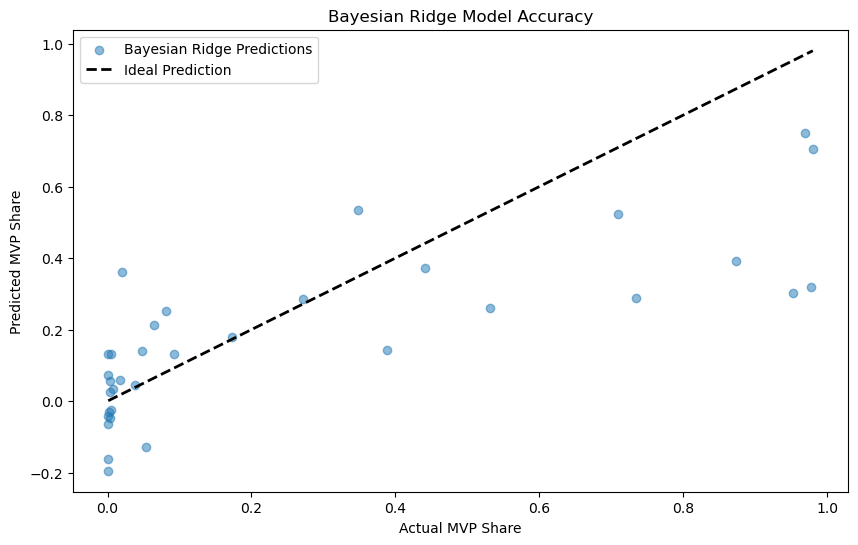

<Figure size 640x480 with 0 Axes>

In [14]:
#Evaluation
r2_bayesian = r2_score(y_test, y_pred_bayesian)
print(f"Bayesian Ridge Model Accuracy (R-Squared)): {r2_bayesian * 100:.2f}%")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_bayesian, alpha=0.5, label='Bayesian Ridge Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal Prediction')
plt.xlabel('Actual MVP Share')
plt.ylabel('Predicted MVP Share')
plt.title('Bayesian Ridge Model Accuracy')
plt.legend()
plt.show()
plt.savefig('images/br_accuracy.png')

In [15]:
#Calculate correlations
correlation_matrix = df[features + ['Share']].corr()

In [16]:
#Select correlations of features with the target variable
target_correlations = correlation_matrix['Share'].drop('Share')

In [17]:
#Select correlations of features with the target variable
target_correlations = correlation_matrix['Share'].drop('Share')

In [18]:
target_correlations

AST                 0.278519
STL                 0.231841
G                   0.174520
PTS                 0.475827
WS                  0.658018
eFG%                0.294458
Raptor Offense      0.352276
Raptor Defense      0.103010
Predator Offense    0.368802
Predator Defense    0.112379
Odds                0.315048
Name: Share, dtype: float64

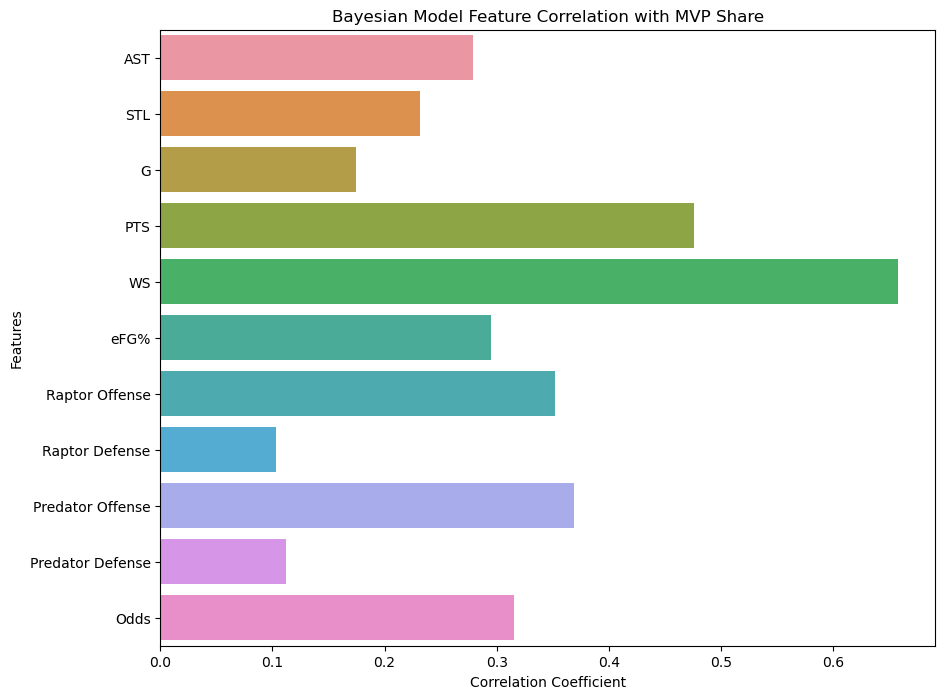

<Figure size 640x480 with 0 Axes>

In [19]:
# Plotting
plt.figure(figsize=(10, 8))
sns.barplot(x=target_correlations.values, y=target_correlations.index)
plt.title('Bayesian Model Feature Correlation with MVP Share')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()
plt.savefig('images/feature_correlation.png')

In [20]:
X_test = dftest[features]
#Run predictions
y_pred_test = bayesian_model.predict(X_test)

#Making Dataframe
predicted_shares = pd.DataFrame({
    'Player': dftest['Player'],
    'Predicted Share': y_pred_test,
    'Actual Share': dftest['Share']
})
predicted_shares = predicted_shares.sort_values(by='Predicted Share', ascending=False)

In [21]:
predicted_shares

,Player,Predicted Share,Actual Share
193,Nikola Jokic,0.490686,0.961
199,Damian Lillard,0.338010,0.038
196,Giannis Antetokounmpo,0.266648,0.345
195,Stephen Curry,0.249602,0.449
194,Joel Embiid,0.188194,0.580
198,Luka Doncic,0.175169,0.042
207,Kawhi Leonard,0.117171,0.001
200,Julius Randle,-0.018105,0.020
197,Chris Paul,-0.030070,0.138
202,Rudy Gobert,-0.049873,0.008


In [22]:
dftest

,Unnamed: 0.1,Unnamed: 0,Season,Rank,Player,Pos,Age,G,MP,PTS,...,First,Pts Won,Pts Max,Share,MVP,Raptor Offense,Raptor Defense,Predator Offense,Predator Defense,Odds
193,193,358,2021,1,Nikola Jokic,C,25,72,34.6,26.4,...,91,971,1010,0.961,1,5.932322,1.100147,3.881031,1.354002,-2500
194,194,359,2021,2,Joel Embiid,C,26,51,31.1,28.5,...,1,586,1010,0.580,0,3.675291,5.775936,1.766479,5.211762,-4000
195,195,360,2021,3,Stephen Curry,PG,32,63,34.2,32.0,...,5,453,1010,0.449,0,8.738701,-1.939050,8.087152,-1.656422,-1100
196,196,361,2021,4,Giannis Antetokounmpo,PF,26,61,33.0,28.1,...,1,348,1010,0.345,0,3.343624,3.236281,2.910820,3.865651,-500
197,197,362,2021,5,Chris Paul,PG,35,70,31.4,16.4,...,2,139,1010,0.138,0,5.070251,-1.955907,4.877183,-2.009794,-8000
198,198,363,2021,6,Luka Doncic,PG,21,66,34.3,27.7,...,0,42,1010,0.042,0,9.343924,1.978443,10.288693,1.578839,-400
199,199,364,2021,7,Damian Lillard,PG,30,67,35.8,28.8,...,0,38,1010,0.038,0,16.329350,5.258404,12.515026,3.903481,-2000
200,200,365,2021,8,Julius Randle,PF,26,71,37.6,24.1,...,0,20,1010,0.020,0,-6.952186,0.315181,-7.247945,-0.803198,-100000
202,202,367,2021,10,Rudy Gobert,C,28,71,30.8,14.3,...,0,8,1010,0.008,0,0.997255,3.677359,0.271345,4.007218,-20000
203,203,368,2021,11,Russell Westbrook,PG,32,65,36.4,22.2,...,0,5,1010,0.005,0,-1.215381,-5.131705,3.167448,-6.440380,-10000
